# Project:
## NASA: Asteroids Classification

Vidit Goyal
Machine Learning Engineer Intern 		  
AI Technology and Systems <br>
www.ai-techsystems.com	
vidit2011998@gmail.com

The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) . With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.



In [55]:
#Auticate access to Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
#Un cleaned data
nasa = pd.read_csv('/content/drive/My Drive/MLandAI/NASA/nasa.csv')
print(nasa.shape)
nasa.head()

(4687, 40)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Initially the data has 4687 samples. Each having 40 attributes

In [57]:
#Check null values
null_counts = nasa.isnull().sum()
null_counts

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

### Here there are no Null values.
### Therefore we will proceed to next step.

In [58]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset
nasa.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Data Preprocessing

In [59]:
nasa.info()
object_column_df = nasa.select_dtypes(include=['object'])
print("\n Only Object values: ")
print(object_column_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

### We don't need these object values(Close approach date, Orbiting body, Determination date, Equinox) and therefore remove them

In [60]:
#Removed Equinox and Orbiting Body
nasa = nasa.loc[:,nasa.apply(pd.Series.nunique) != 1]
print(nasa.shape)

nasa.head()

(4687, 38)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### Orbiting body, Equinox column have been removed as they had only one value i.e. Earth and J2000 only

In [61]:
#Take averages of maximum and minumums
nasa['avg_dia'] = nasa[['Est Dia in KM(min)', 'Est Dia in KM(max)']].mean(axis=1)

#Remove Unnecessary columns 
nasa = nasa.drop(['Neo Reference ID','Name','Close Approach Date',
                 'Orbit ID','Orbit Determination Date',
                 'Est Dia in KM(min)', 'Est Dia in KM(max)',
                 'Est Dia in M(min)','Est Dia in M(max)',
                 'Est Dia in Miles(min)','Est Dia in Miles(max)',
                 'Est Dia in Feet(min)','Est Dia in Feet(max)',
                 'Epoch Date Close Approach',
                 'Relative Velocity km per sec',
                 'Miles per hour','Miss Dist.(Astronomical)',
                 'Miss Dist.(lunar)','Miss Dist.(miles)'],axis=1)


#Change positions of avg_dia column
nasa.insert(2, 'avg_diameter', nasa['avg_dia'])
nasa.drop(['avg_dia'],axis = 1,inplace=True)
nasa.head()


,Absolute Magnitude,Relative Velocity km per hr,avg_diameter,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,22017.003799,0.205846,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,65210.346095,0.236343,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,27326.560182,0.374578,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,40225.948191,0.014241,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,35426.991794,0.205846,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


### Took average of minimum diameter and maximum diameter and took the average and named it as "avg_diameter" column
### Next we removed all the unnecessary columns

# Final Cleaned Data

## Finally saved the preprocessed data in seperate file

In [62]:
nasa.to_csv('/content/drive/My Drive/MLandAI/NASA/nasa_cleaned.csv',index=False)
nasa_cleaned = pd.read_csv('/content/drive/My Drive/MLandAI/NASA/nasa_cleaned.csv')
print(nasa_cleaned.shape)


(4687, 20)


# Analysis

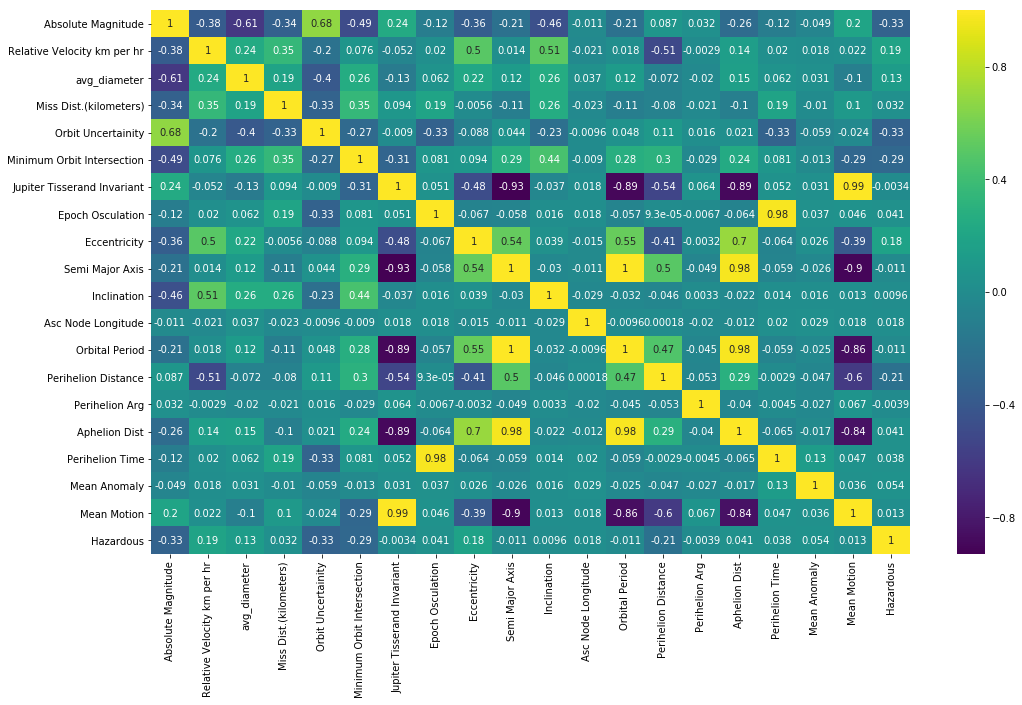

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = nasa_cleaned.corr()
plt.rcParams['figure.figsize'] = [17,10]
sns.heatmap(nasa_cleaned.corr(), annot = True,cmap='viridis');

Analysis on Target data i.e. Hazardous or Not


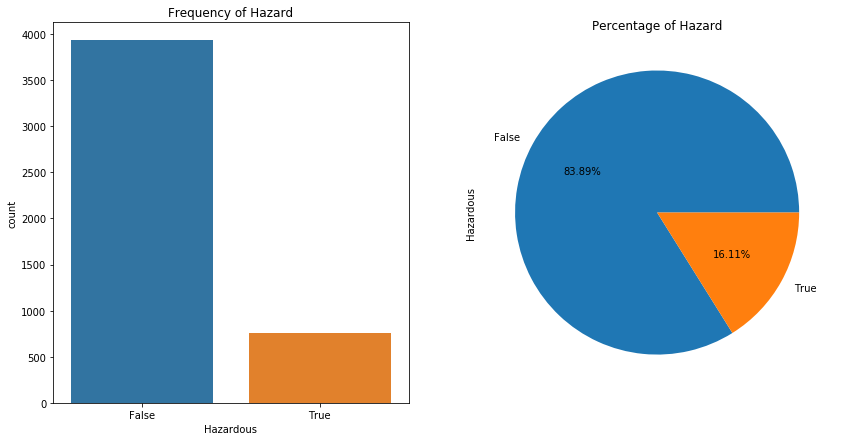

In [64]:
print("Analysis on Target data i.e. Hazardous or Not")

fig, axs = plt.subplots(1,2,figsize=(14,7))

sns.countplot(x='Hazardous',data=nasa_cleaned,ax=axs[0])
axs[0].set_title("Frequency of Hazard")

nasa_cleaned.Hazardous.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of Hazard")
plt.show()

## Observation:

### The total number of asteroid which are not hazardous are approx 3900 and hazardous are 700

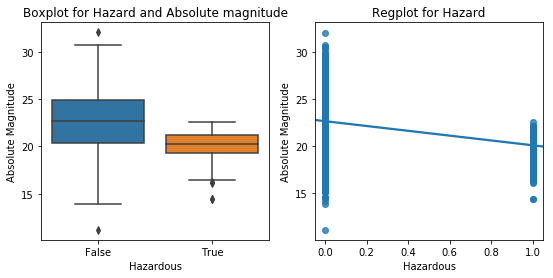

In [65]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
x=nasa_cleaned['Hazardous']
y=nasa_cleaned['Absolute Magnitude']

sns.boxplot(x,y,ax=axs[0])
axs[0].set_title("Boxplot for Hazard and Absolute magnitude")


sns.regplot(x,y,ax=axs[1])
axs[1].set_title("Regplot for Hazard")
  

plt.show()



1. Most asteroids of Absolute Magnitude 20-25 are Not Hazardous whereas of 19-21 are Hazardous.

2.  Non hazardous can be as low as 14 and as high as 32 in Magnitude
3. Hazardous can be as low as 16 and as high as 22 in Magnitude

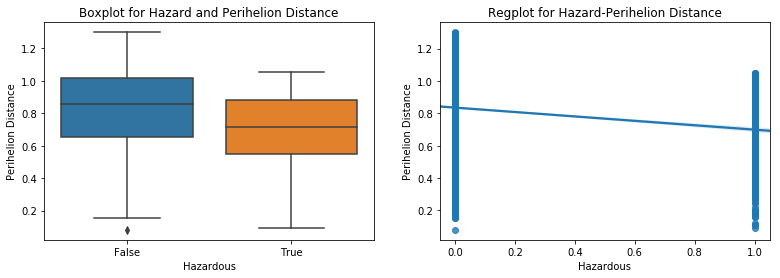

In [66]:
fig, axs = plt.subplots(1,2,figsize=(13,4))
x=nasa_cleaned['Hazardous']
y=nasa_cleaned['Perihelion Distance']

sns.boxplot(x,y,ax=axs[0])
axs[0].set_title("Boxplot for Hazard and Perihelion Distance")


sns.regplot(x,y,ax=axs[1])
axs[1].set_title("Regplot for Hazard-Perihelion Distance")
  

plt.show()

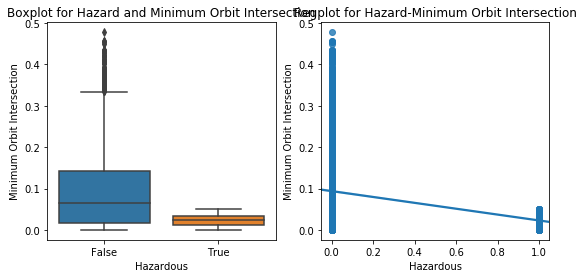

In [67]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
x=nasa_cleaned['Hazardous']
y=nasa_cleaned['Minimum Orbit Intersection']

sns.boxplot(x,y,ax=axs[0])
axs[0].set_title("Boxplot for Hazard and Minimum Orbit Intersection")


sns.regplot(x,y,ax=axs[1])
axs[1].set_title("Regplot for Hazard-Minimum Orbit Intersection")
  

plt.show()

1. Most asteroids having a Minimum Orbit Intersection 0-0.11 are Not Hazardous whereas of 0-0.02 are Hazardous. 

2. Non hazardous can be as low as 0 and as high as 0.5 in Minimum Orbit Intersection.
3. print("Hazardous can be as low as 0 and as high as 0.02 in Minimum Orbit Intersection.


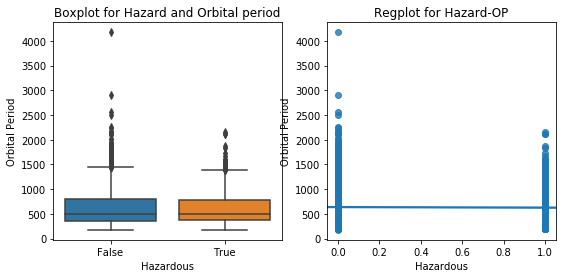

In [68]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
x=nasa_cleaned['Hazardous']
y=nasa_cleaned['Orbital Period']

sns.boxplot(x,y,ax=axs[0])
axs[0].set_title("Boxplot for Hazard and Orbital period")


sns.regplot(x,y,ax=axs[1])
axs[1].set_title("Regplot for Hazard-OP")
  

plt.show()

1. Most asteroids having Orbital Period 450-900 are Not Hazardous whereas of 400-800 are Hazardous

2. Non hazardous can be as low as 0 and as high as 400 in Orbital Period
3. Hazardous can be as low as 0 and as high as 2000 in Orbital Period

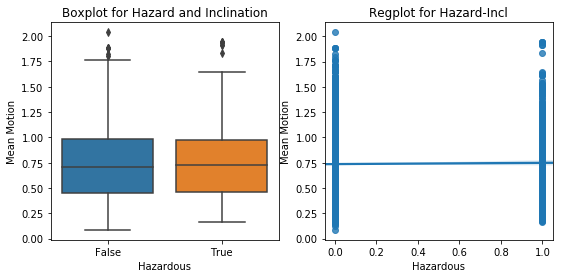

In [69]:
fig, axs = plt.subplots(1,2,figsize=(9,4))
x=nasa_cleaned['Hazardous']
y=nasa_cleaned['Mean Motion']

sns.boxplot(x,y,ax=axs[0])
axs[0].set_title("Boxplot for Hazard and Inclination")


sns.regplot(x,y,ax=axs[1])
axs[1].set_title("Regplot for Hazard-Incl")
  

plt.show()

1. Most asteroids having Mean Motion 0.5-1 are Not Hazardous whereas of 0.6-1 are Hazardous.

2. Non hazardous can be as low as 0 and as high as 2.1 in Mean Motion
3. Hazardous can be as low as 0 and as high as 0.77 in Mean Motion





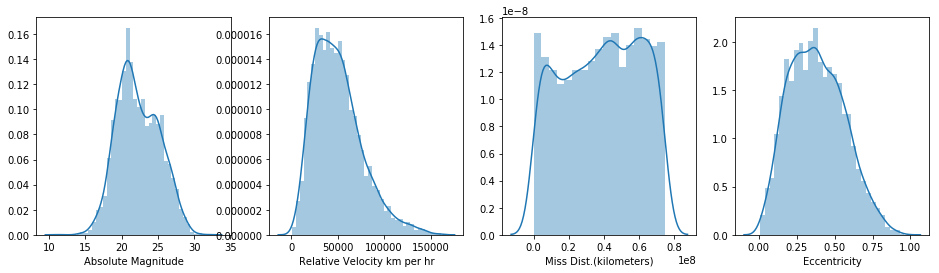

In [70]:
fig, axs = plt.subplots(1,4,figsize=(16,4))
sns.distplot(nasa_cleaned['Absolute Magnitude'],ax=axs[0])
sns.distplot(nasa_cleaned['Relative Velocity km per hr'],ax=axs[1])
sns.distplot(nasa_cleaned['Miss Dist.(kilometers)'],ax=axs[2])
sns.distplot(nasa_cleaned['Eccentricity'],ax=axs[3])



### Observation : these attributes have bell-shaped curve that suggests it is normal




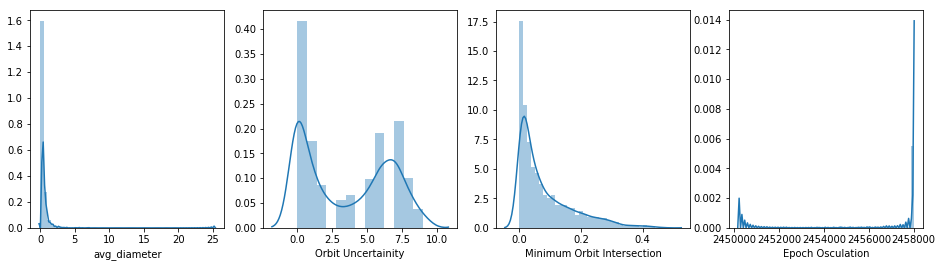

In [71]:
fig, axs = plt.subplots(1,4,figsize=(16,4))
sns.distplot(nasa_cleaned['avg_diameter'],ax=axs[0])
sns.distplot(nasa_cleaned['Orbit Uncertainity'],ax=axs[1])
sns.distplot(nasa_cleaned['Minimum Orbit Intersection'],ax=axs[2])
sns.distplot(nasa_cleaned['Epoch Osculation'],ax=axs[3])


### 1. Distplot 1, 3 are right skewed i.e. not normal

### 2. Distplot 2, 4 are bi-modal i.e. 2 independent sources of variation

# Principal Component Analysis

In [0]:
x_cols = nasa_cleaned.columns
y = nasa_cleaned[['Hazardous']].astype(int)
X = nasa_cleaned.drop(['Hazardous'],axis=1) 

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

Projecting 19-dimensional data to 2D


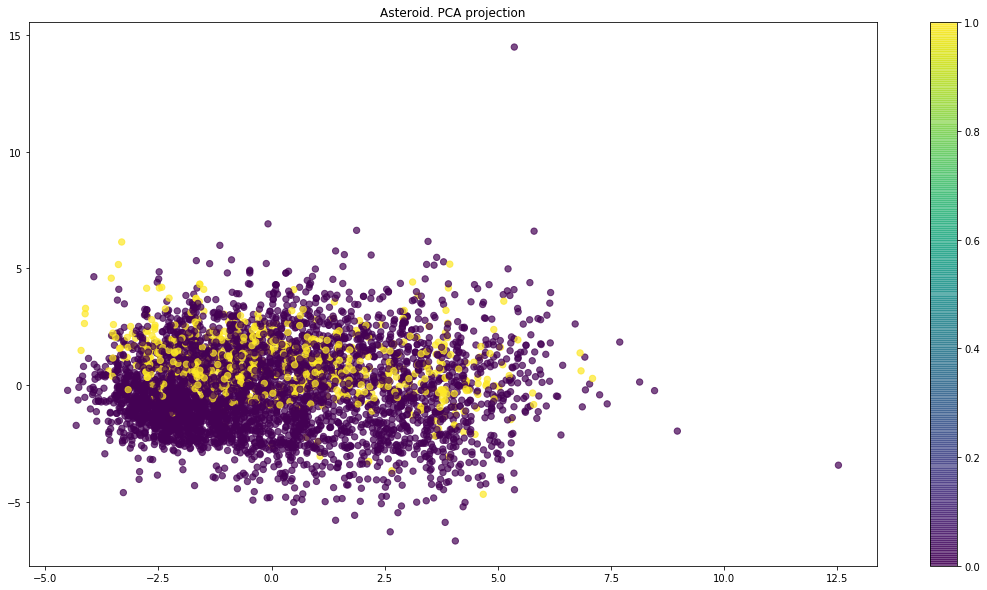

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(19,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=nasa_cleaned['Hazardous'], alpha=0.7, s=40);
plt.colorbar()
plt.title('Asteroid. PCA projection');

# Model Training

## Prediction with Gradient Boosting classifier

In [75]:
# transform data
from sklearn.preprocessing import MinMaxScaler
# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)



X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, y_train, random_state=0)


# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub.values.ravel())
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()





Learning rate:  0.05
Accuracy score (training): 0.833
Accuracy score (validation): 0.849

Learning rate:  0.1
Accuracy score (training): 0.853
Accuracy score (validation): 0.865

Learning rate:  0.25
Accuracy score (training): 0.983
Accuracy score (validation): 0.978

Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.995

Learning rate:  0.75
Accuracy score (training): 0.999
Accuracy score (validation): 0.997

Learning rate:  1
Accuracy score (training): 0.999
Accuracy score (validation): 0.997



## Prediction with XGB classifier



In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score :  0.9948805460750854
f1_Score is    :  0.9949031875607152


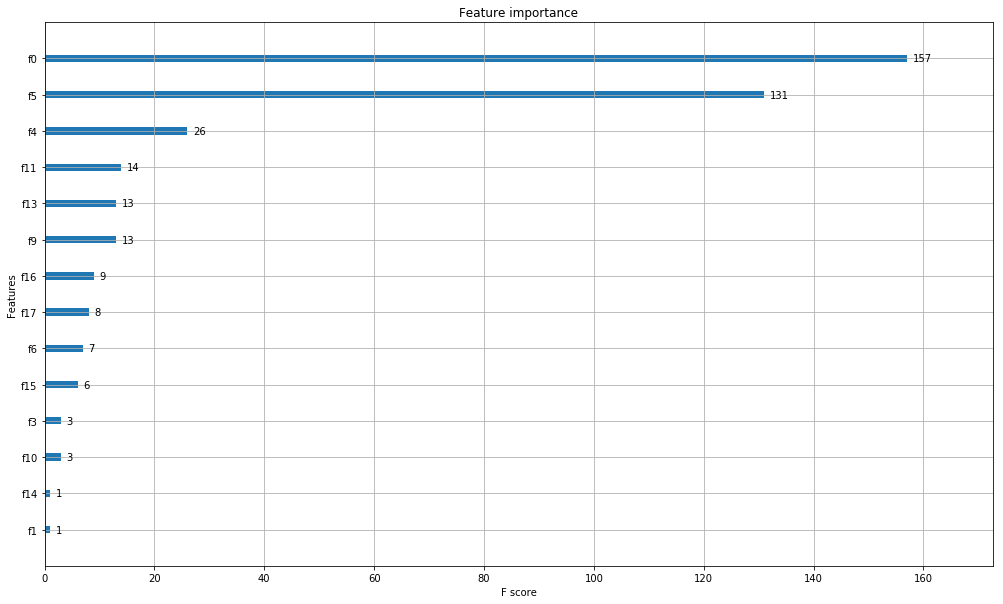

In [77]:
xgb_importance = XGBClassifier()
model_importance = xgb_importance.fit(X_train,y_train)
pred = model_importance.predict(X_test)

# Accuracy and f1_score of the XGB model
print ("Accuracy Score : ", accuracy_score(y_test, pred))
print ("f1_Score is    : ", f1_score(y_test, pred, average = 'weighted'))

# Plot feature importance
plot_importance(model_importance)

### Observation : We have a training accuracy of 99.9% and a validation accuracy or 99.7%

In [78]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub.values.ravel())
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

Confusion Matrix:
[[746   0]
 [  4 129]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       746
           1       1.00      0.97      0.98       133

    accuracy                           1.00       879
   macro avg       1.00      0.98      0.99       879
weighted avg       1.00      1.00      1.00       879



true negatives (TN): 740 <br>
false positives (FP): 0 <br>
false negatives (FN): 4<br>
true positives (TP): 129

## Prediction with Decision tree classifier




In [79]:
# import libraries
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


max_depth = 6
min_samples_split = 5
tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
tree_two = tree_two.fit(X, y)

# Look at the score of the included features
tree_two_accuracy = round(tree_two.score(X, y), 4)
print("Accuracy: %0.4f" % (tree_two_accuracy))




Accuracy: 0.9994


### Observation : We have a training accuracy of 99.4%

In [80]:

# Predict y_target given validation set
predictions = tree_two.predict(X_test)
print(predictions)
print("\n")

## Look at the confusion matrix ([TN,FN],[FP,TP])
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))





[0 0 0 ... 0 0 0]


[[935  55]
 [116  66]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       990
           1       0.55      0.36      0.44       182

    accuracy                           0.85      1172
   macro avg       0.72      0.65      0.68      1172
weighted avg       0.84      0.85      0.84      1172



true negatives (TN): 990 <br>
false positives (FP): 0 <br>
false negatives (FN): 2<br>
true positives (TP): 180